In [1]:
import tensorflow as tf

In [2]:

import yfinance as yf
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

start = '2025-02-01'
end = '2025-06-08'
stock = 'SBI'

data = yf.download(stock, start, end)

print(data)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open  Volume
Ticker           SBI       SBI       SBI       SBI     SBI
Date                                                      
2025-02-03  7.567947  7.587402  7.567947  7.567947   49400
2025-02-04  7.577675  7.616585  7.558220  7.587403  204500
2025-02-05  7.616584  7.636039  7.597129  7.597129   78300
2025-02-06  7.636040  7.645767  7.616585  7.636040   95700
2025-02-07  7.616584  7.655494  7.587402  7.645767   50400
...              ...       ...       ...       ...     ...
2025-06-02  7.408056  7.437888  7.378225  7.427944   78800
2025-06-03  7.378225  7.427944  7.378225  7.388169   76300
2025-06-04  7.408056  7.447831  7.388169  7.388169   44500
2025-06-05  7.437888  7.467719  7.408056  7.427944  118900
2025-06-06  7.398113  7.437888  7.388169  7.418000   56100

[87 rows x 5 columns]


Price        Date     Close      High       Low      Open  Volume
Ticker                  SBI       SBI       SBI       SBI     SBI
0      2025-02-03  7.567947  7.587402  7.567947  7.567947   49400
1      2025-02-04  7.577675  7.616585  7.558220  7.587403  204500
2      2025-02-05  7.616584  7.636039  7.597129  7.597129   78300
3      2025-02-06  7.636040  7.645767  7.616585  7.636040   95700
4      2025-02-07  7.616584  7.655494  7.587402  7.645767   50400
..            ...       ...       ...       ...       ...     ...
82     2025-06-02  7.408056  7.437888  7.378225  7.427944   78800
83     2025-06-03  7.378225  7.427944  7.378225  7.388169   76300
84     2025-06-04  7.408056  7.447831  7.388169  7.388169   44500
85     2025-06-05  7.437888  7.467719  7.408056  7.427944  118900
86     2025-06-06  7.398113  7.437888  7.388169  7.418000   56100

[87 rows x 6 columns]


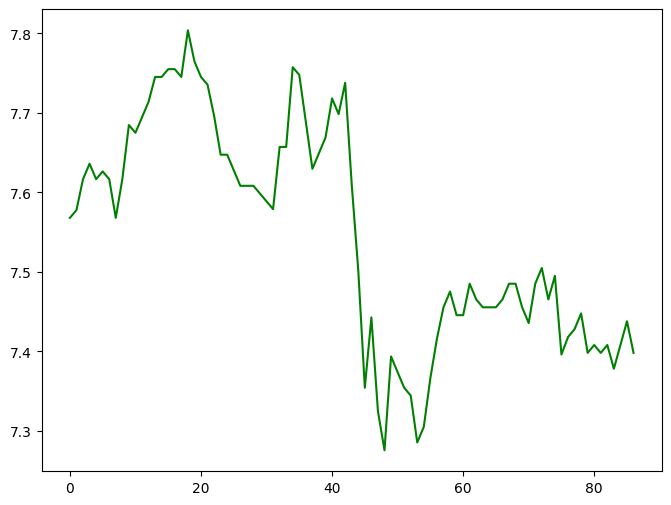

In [3]:
data.reset_index(inplace=True)

print(data)

ma_100_days = data.Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

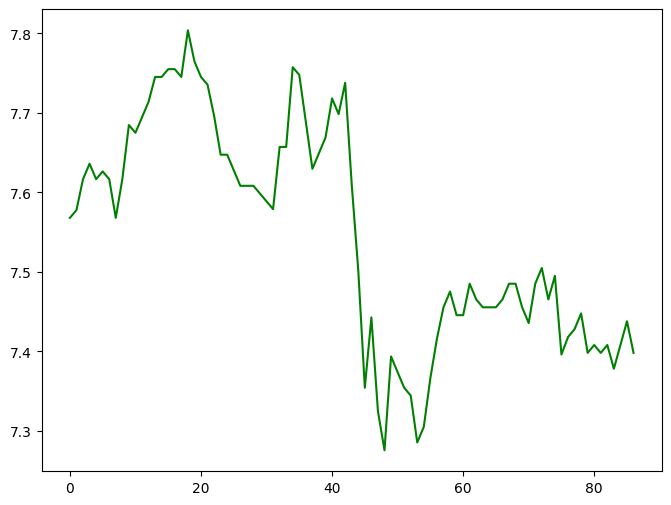

In [4]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [5]:

data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

data_train.shape[0]
data_test.shape[0]

18

In [6]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_train_scale = scaler.fit_transform(data_train)


In [7]:

x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

In [8]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [9]:
print(x.shape)
print("data_train_scale shape:", data_train_scale.shape)
if len(x) > 0:
    x = np.array(x)
    y = np.array(y)
    print("x shape after sequence prep:", x.shape)
else:
    print("Error: Not enough data to create sequences.")



(0,)
data_train_scale shape: (69, 1)
Error: Not enough data to create sequences.


In [10]:
import numpy as np

# Example: window size 10 for 68 rows
window_size = 10
x = []
y = []

for i in range(window_size, data_train_scale.shape[0]):
    x.append(data_train_scale[i-window_size:i])
    y.append(data_train_scale[i, 0])

x = np.array(x)
y = np.array(y)

# Check shapes
print("x shape before reshape:", x.shape)
if len(x.shape) == 2:
    x = x.reshape((x.shape[0], x.shape[1], 1))
print("x shape after reshape:", x.shape)

# LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x, y, epochs=50, batch_size=16, verbose=1)

model.summary()


x shape before reshape: (59, 10, 1)
x shape after reshape: (59, 10, 1)


d:\my_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3686
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3452
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2359
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1389
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0980
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0841
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0826
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0750
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0633
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1022
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0711
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0800
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0796
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0544
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0716
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [11]:
pas_100_days = data_train.tail(100)

data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

data_test_scale  =  scaler.fit_transform(data_test)

In [12]:
data_test

Ticker,SBI
0,7.567947
1,7.577675
2,7.616584
3,7.636040
4,7.616584
...,...
82,7.408056
83,7.378225
84,7.408056
85,7.437888


In [13]:
x = []
y = []

In [14]:
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [15]:
y_predict = model.predict(x)

scale = 1 / scaler.scale_

y_predict = y_predict*scale

y = y*scale



C:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'y_predict' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
last_100_days = data.Close.tail(100).values
last_100_days_scaled = scaler.transform(last_100_days.reshape(-1, 1))

future_days = 360
future_predictions = []
current_input = last_100_days_scaled

c:\Users\singh\my_project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
for _ in range(future_days):
    prediction = model.predict(current_input.reshape(1, 100, 1))
    future_predictions.append(prediction[0, 0])
    current_input = np.append(current_input[1:], prediction, axis=0)
    
future_predictions = scaler.inverse_transform(np.concatenate((last_100_days_scaled, np.array(future_predictions).reshape(-1, 1)), axis=0))[-future_days:]


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data.Close, 'g', label='Historical Close Price')
plt.plot(range(len(data.Close), len(data.Close) + future_days), future_predictions, 'r', label='Future Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('my_lstm_model.keras')
